# **HW2: Kinematics of Robot**

นายณัฐภัทร สุขปัญญา 65340500023

In [28]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
import matplotlib.pyplot as plt
from math import pi
from math import radians

## 1. Modified DH-Parameters

In [29]:
# drfine variable unit = meter
l1 = l3 = l5 = 200/1000
l2 = l4 = 700/1000
l6 = 300/1000
l7 = 500/1000

In [30]:
# Create MDH Parameter
# d,offset = along z axis
# a,alpha = along x axis
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(alpha = 0.0,a = 0.0,d = 0.2,offset = 0.0),
        rtb.RevoluteMDH(alpha = pi/2,a = 0.0,d = 0.12,offset = pi/2),
        rtb.RevoluteMDH(alpha = 0,a = 0.25,d = -0.1,offset = pi/2),

    ],tool = SE3.Tx(0.28),
    name = "RRR_Robot"
)
print('MDH-Parameter ของแขนกล')
print(robot)

MDH-Parameter ของแขนกล
DHRobot: RRR_Robot, 3 joints (RRR), dynamics, modified DH parameters
┌──────┬───────┬───────────┬──────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │    θⱼ     │  dⱼ  │
├──────┼───────┼───────────┼──────┤
│  0.0 │  0.0° │        q1 │  0.2 │
│  0.0 │ 90.0° │  q2 + 90° │ 0.12 │
│ 0.25 │  0.0° │  q3 + 90° │ -0.1 │
└──────┴───────┴───────────┴──────┘

┌──────┬──────────────────────────────────────┐
│ tool │ t = 0.28, 0, 0; rpy/xyz = 0°, 0°, 0° │
└──────┴──────────────────────────────────────┘



##### 1.2. จงแสดงให้เห็นว่า MDH-Parameter ที่ระบุมาในข้อ 1.1 สามารถแสดง Kinematic ของหุ่นยนต์ได้

In [31]:
# หา Forward kinematic ที่จุด Home Configuration
q = [0,0,0] # สร้างค่า q

con_T_0e = robot.fkine(q) # ใส่ค่า q ลงในตาราง DH
print('Transformation ของ End-Effector ที่จุด Home Configuration')
print(con_T_0e) # จะได้ forward kinematic ของหุ่น RRR_Robot

Transformation ของ End-Effector ที่จุด Home Configuration
  -1         0         0        -0.28      
   0         0        -1        -0.02      
   0        -1         0         0.45      
   0         0         0         1         



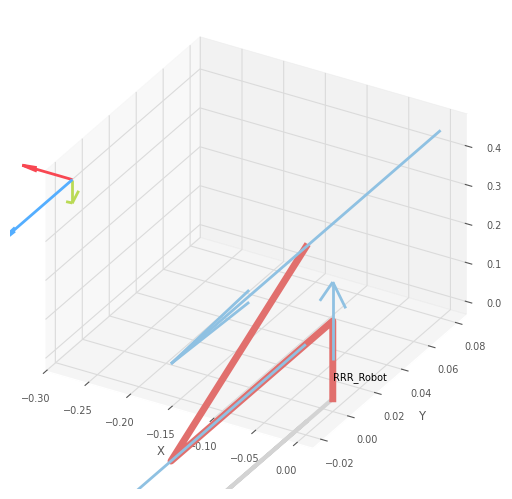

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [32]:
robot.plot(q)

## 4. Workspace

##### 4.1. จงแสดงให้เห็น Workspace ของหุ่นยนต์

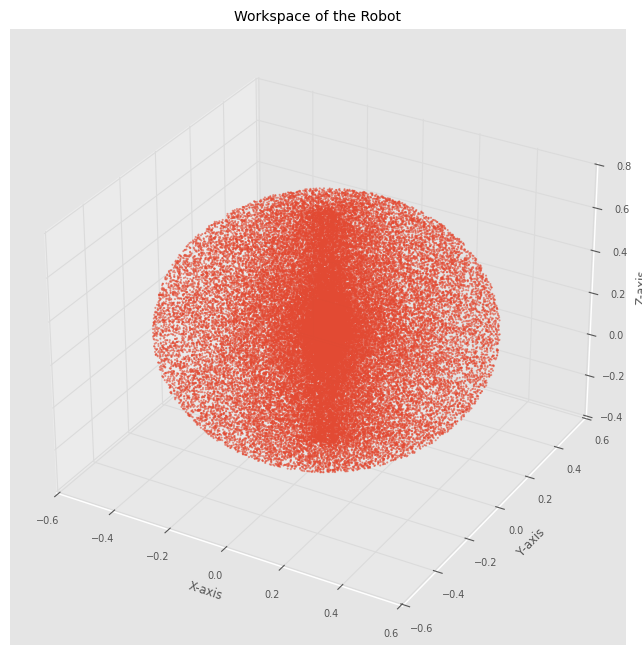

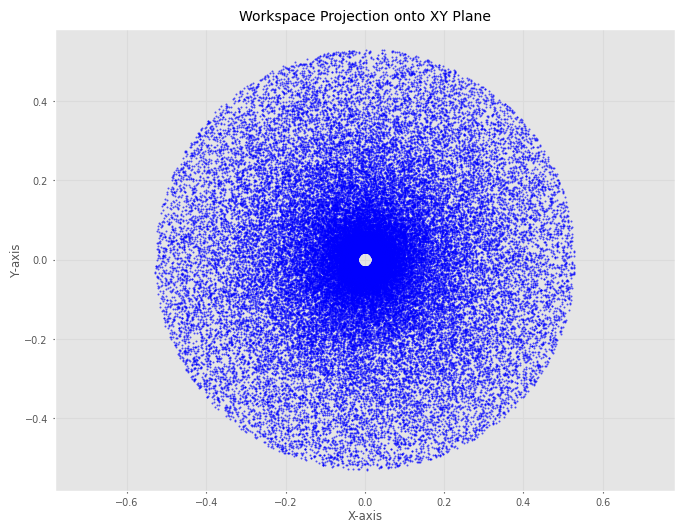

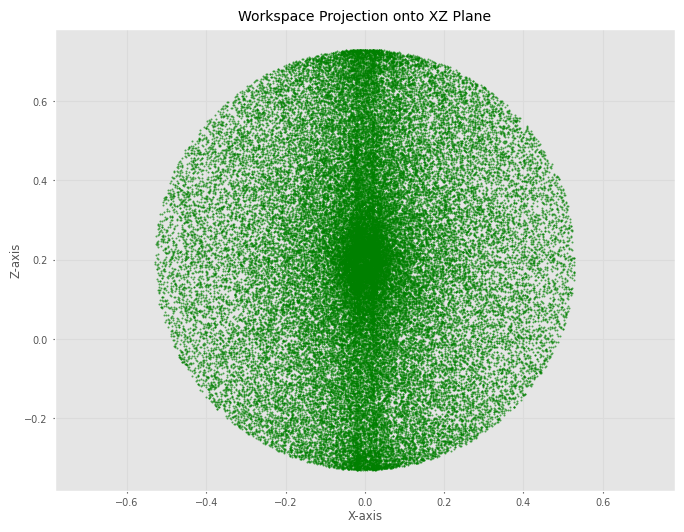

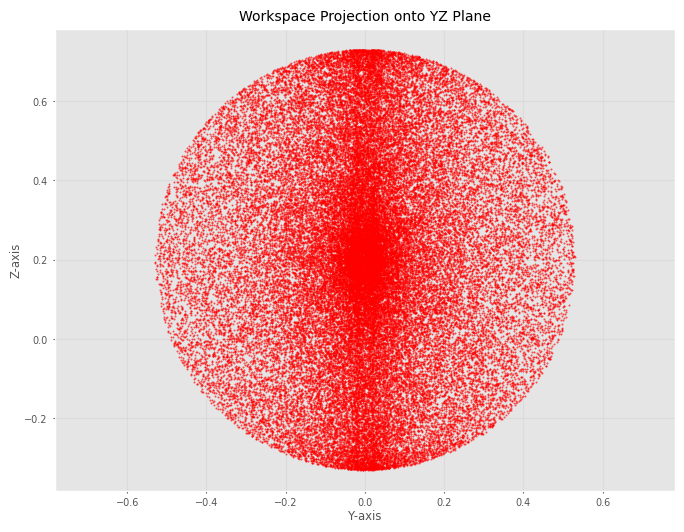

In [41]:
# Define joint limits for each joint (adjust as per your robot's specifications)
joint_limits = [
    (-np.pi, np.pi),  # Joint 1 limits
    (-np.pi, np.pi),  # Joint 2 limits
    (-np.pi, np.pi),  # Joint 3 limits
]

# Number of samples
N = 60000  # Adjust based on computational resources

# Generate random joint configurations within the limits
q_samples = np.zeros((N, 3))
for i, (q_min, q_max) in enumerate(joint_limits):
    q_samples[:, i] = np.random.uniform(q_min, q_max, N)

# Compute the end-effector positions
ee_positions = np.zeros((N, 3))
for i, q in enumerate(q_samples):
    T = robot.fkine(q)  # Forward kinematics
    ee_positions[i, :] = T.t  # Extract the translation component

# Plot the workspace
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ee_positions[:, 0], ee_positions[:, 1], ee_positions[:, 2], s=1, alpha=0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Workspace of the Robot')
plt.show()

# Plot the XY plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 0], ee_positions[:, 1], s=1, alpha=0.5, color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Workspace Projection onto XY Plane')
plt.axis('equal')  # Ensure equal scaling on both axes
plt.grid(True)
plt.show()

# Plot the XZ plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 0], ee_positions[:, 2], s=1, alpha=0.5, color='green')
plt.xlabel('X-axis')
plt.ylabel('Z-axis')
plt.title('Workspace Projection onto XZ Plane')
plt.axis('equal')  # Ensure equal scaling on both axes
plt.grid(True)
plt.show()

# Plot the YZ plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 1], ee_positions[:, 2], s=1, alpha=0.5, color='red')
plt.xlabel('Y-axis')
plt.ylabel('Z-axis')
plt.title('Workspace Projection onto YZ Plane')
plt.axis('equal')  # Ensure equal scaling on both axes
plt.grid(True)
plt.show()